# Impulso Invariante - Chebyshev Tipo 1
Respuesta en frecuencia de filtros Chebyshev Tipo 1 de orden $n$
$$|H(\Omega)|^2  = \frac{1}{1+\varepsilon^2T_n^2(\Omega/\Omega_p)}$$
donde $T_n(x)$ es el polinomio de Chebyshev de orden $n$, $\varepsilon$ es el rizado en la banda de paso, y $\Omega_p$ es la frecuencia de paso.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

[-0.63615268+0.54835489j -0.63615268-0.54835489j -0.26350307-1.32384581j
 -0.26350307+1.32384581j  0.26350307+1.32384581j  0.26350307-1.32384581j
  0.63615268-0.54835489j  0.63615268+0.54835489j]


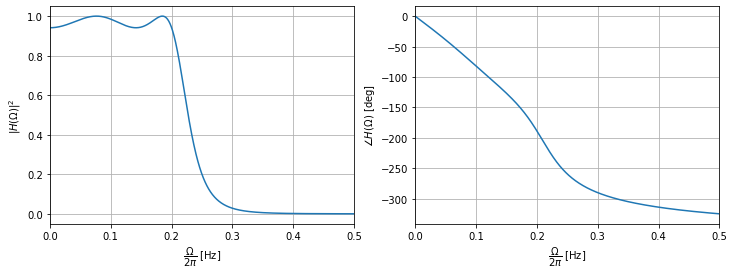

In [2]:
# Diseñando un Filtro Chebyshev
fs = 1
T = 1/fs

e = 0.25
fc = 0.2
omg_c = 2*np.pi*fc
n_order = 4

# Polos del filtro Chebyshev
a = np.zeros(n_order+1)
a[n_order] = 1
Tn = np.polynomial.chebyshev.Chebyshev(a)
Tn2 = 1 + e**2 * (Tn * Tn)

# Se seleccionan los polos en el lado izquierdo del plano-s (Re{s_k}<0)
roots = np.polynomial.chebyshev.Chebyshev.roots(Tn2)
s_roots = np.sort_complex(roots*1j*omg_c)
print(s_roots)

N = 1000
omg = np.arange(N)/N*(np.pi*fs)

# Calculando coeficientes de la expansión en fracciones parciales
ck = np.ones(n_order,dtype=complex) * omg_c / e
for k in range(n_order):    
    for l in range(n_order):
        if k!=l:
            ck[k] = ck[k]*(omg_c/2)/(s_roots[k]-s_roots[l])

# Calculando la respuesta en frecuencia
Homg = 0
for k in range(n_order):    
    Homg = Homg + ck[k]/(1j*omg-s_roots[k])

fig = plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
plt.plot(omg/(2*np.pi),np.abs(Homg)**2)
plt.xlim([0,fs/2])
plt.xlabel('$\dfrac{\Omega}{2\pi}$ [Hz]')
plt.ylabel('$|H(\Omega)|^2$')
plt.grid('on')

plt.subplot(1,2,2)
plt.plot(omg/(2*np.pi),np.unwrap(np.angle(Homg))*180/np.pi)
plt.xlim([0,fs/2])
plt.xlabel('$\dfrac{\Omega}{2\pi}$ [Hz]')
plt.ylabel('$\\angle H(\Omega)$ [deg]')
plt.grid('on')


[0.45171708+0.27592866j 0.45171708-0.27592866j 0.18782301-0.74504519j
 0.18782301+0.74504519j 0.31814467+1.26199743j 0.31814467-1.26199743j
 1.61221037-0.98480901j 1.61221037+0.98480901j]


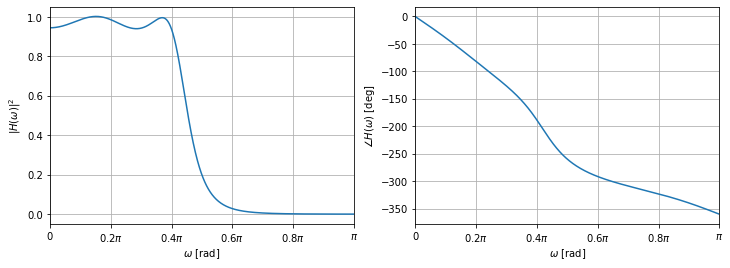

In [3]:
# Calculando el filtro H(z)
N = 1000

w = np.arange(N)/N*(np.pi)
z_roots = np.exp(s_roots/fs)
print(z_roots)

Hw = 0
for k in range(n_order):
    Hw = Hw + ck[k]/(1-z_roots[k]*np.exp(-1j*w))

fig = plt.figure(figsize=[12,4])

xticks = [0,0.2*np.pi,0.4*np.pi,0.6*np.pi,0.8*np.pi,np.pi]
xticklab = ['0','$0.2\pi$','$0.4\pi$','$0.6\pi$','$0.8\pi$','$\pi$']

plt.subplot(1,2,1)
plt.plot(w,np.abs(Hw)**2)
plt.xlim([0,np.pi])
plt.xticks(xticks,labels=xticklab)
plt.xlabel('$\omega$ [rad]')
plt.ylabel('$|H(\omega)|^2$')
plt.grid('on')

plt.subplot(1,2,2)
plt.plot(w,np.unwrap(np.angle(Hw))*180/np.pi)
plt.xlim([0,np.pi])
plt.xticks(xticks,labels=xticklab)
plt.xlabel('$\omega$ [rad]')
plt.ylabel('$\\angle H(\omega)$ [deg]')
plt.grid('on')


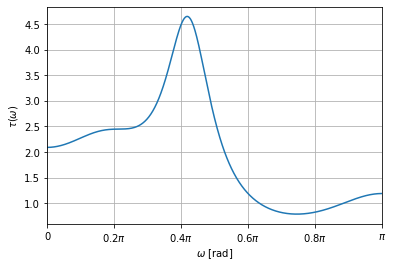

In [4]:
# Calculando retardo de grupo
dw = 1/N*(np.pi)
tau_w = -np.angle(Hw[1:N]/Hw[0:N-1])/dw
w1 = (w[0:N-1]+w[1:N])/2

fig = plt.figure()

plt.plot(w1,tau_w)
plt.xlim([0,np.pi])
plt.xticks(xticks,labels=xticklab)
plt.xlabel('$\omega$ [rad]')
plt.ylabel('$\\tau(\omega)$')
plt.grid('on')
